In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.6766746989395105


Text(0.5, 1.0, '양측 검정')

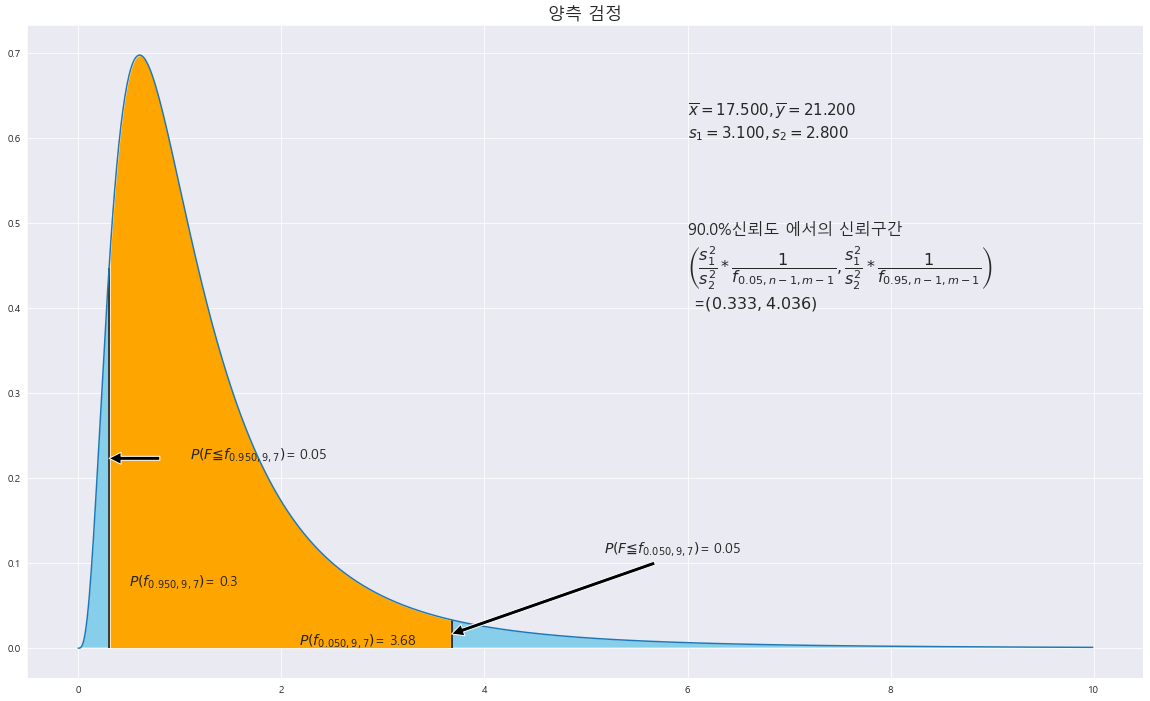

In [53]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 0.2**2
n = 10
m = 8
dof = [[n-1 , m-1]] #자유도

trust = 90
trust = round((1- trust/100)/2,3)



sample_x = 17.5
stand_x = 3.1

sample_y = 21.2
stand_y = 2.8

STDS = math.sqrt(Vars)
MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.95)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.05)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔


ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
# X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
# print(f'X_L_1 : {X_L_1}' )
# X_L_1 = abs(round(X_L_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(X_R_1)

# ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
#
# area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)
#
#
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
# annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


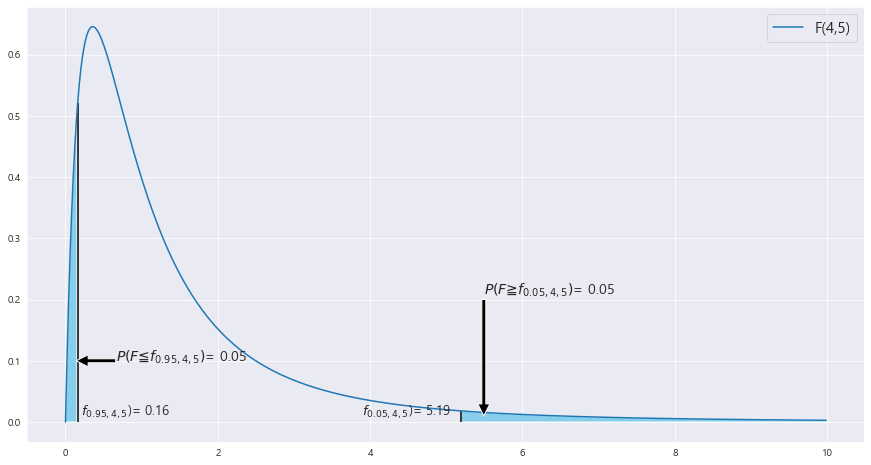

In [3]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize = (15,8))
dof = [[4,5]]
#print(dof[0][0])



X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.95)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.05)

ax.fill_between(X, scipy.stats.f(dof[0][0],dof[0][1]).pdf(X) , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔


ax.vlines(X_r , ymin = 0 , ymax = scipy.stats.f(dof[0][0],dof[0][1]).pdf(X_r) , color = 'black')
ax.vlines(X_l , ymin = 0 , ymax = scipy.stats.f(dof[0][0],dof[0][1]).pdf(X_l) , color = 'black')


ax.annotate('' , xy=(X_l -0.02 , 0.1) , xytext=(X_l + 0.5 , 0.1) , arrowprops = dict(facecolor = 'black'))
ax.text(X_l + 0.5 , 0.1 , r'$P(F\leqq f_{0.95,4,5})$' + f'= {0.05}' , fontsize = 14)

ax.annotate('' , xy=(X_r +0.3 , 0.01) , xytext=(X_r + 0.3 , 0.2) , arrowprops = dict(facecolor = 'black'))
ax.text(X_r + 0.3 , 0.21 , r'$P(F\geqq f_{0.05,4,5})$' + f'= {0.05}' , fontsize = 14)

ax.text(X_l + 0.05 , 0.01 , r'$f_{0.95,4,5}$)' + f'= {round(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(0.05) ,2)}' ,fontsize = 13)
ax.text(X_r - 1.3 , 0.01 , r'$f_{0.05,4,5}$)' + f'= {round(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(0.95) , 2)}' ,fontsize = 13)

for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))
b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

In [5]:
A = pd.DataFrame({'표본 1 ' : [10 , '|x = 17.5' , 's_1 = 3.5'] , '표본 2 ' : [8 , '|y = 21.2' , 's_2 = 2.8']})
A

,표본 1,표본 2
0,10,8
1,|x = 17.5,|y = 21.2
2,s_1 = 3.5,s_2 = 2.8


In [54]:
A = pd.DataFrame({'표본 1 ' : [7 , '|x = 161' , 's_1 = 7.4'] , '표본 2 ' : [6 , '|y = 169' , 's_2 = 9.1']})
A

,표본 1,표본 2
0,7,6
1,|x = 161,|y = 169
2,s_1 = 7.4,s_2 = 9.1


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6.977701858535566


Text(0.5, 1.0, '양측 검정')

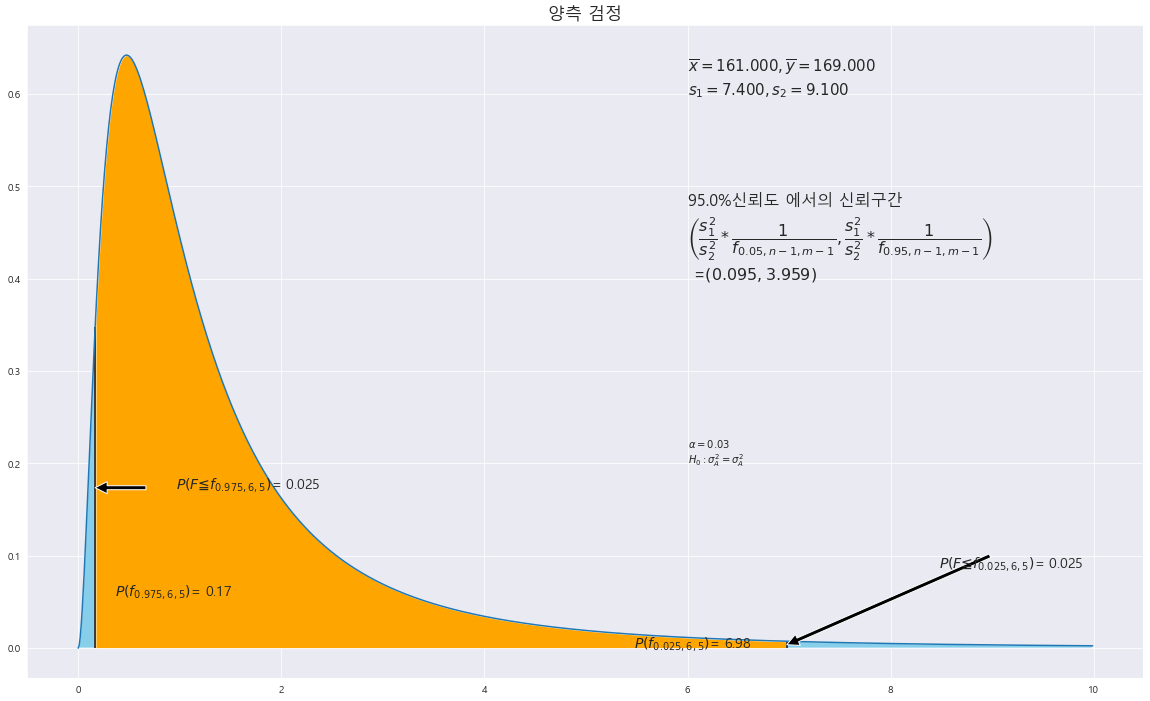

In [75]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 7
m = 6
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



sample_x = 161
stand_x = 7.4

sample_y = 169
stand_y = 9.1
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔


ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)




# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
# X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
# print(f'X_L_1 : {X_L_1}' )
# X_L_1 = abs(round(X_L_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(X_R_1)

# ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
#
# area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)
#
#
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
# annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



In [57]:
A = '72 75 75 80 100 110 125 150 160 200'
B = '50 60 72 90 100 125 125 130 132 170'

A = list(map(int , A.split()))
B = list(map(int ,B.split()))

print(A)
print(B)



[72, 75, 75, 80, 100, 110, 125, 150, 160, 200]
[50, 60, 72, 90, 100, 125, 125, 130, 132, 170]


|x : 114.7
s_x : 43.586567757611846
|y : 105.4
s_y : 37.662831663178075
4.025994158282978


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-81-21d565250dcf>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


X_R_1 : 1.3393
X_L_1 : 0.7467


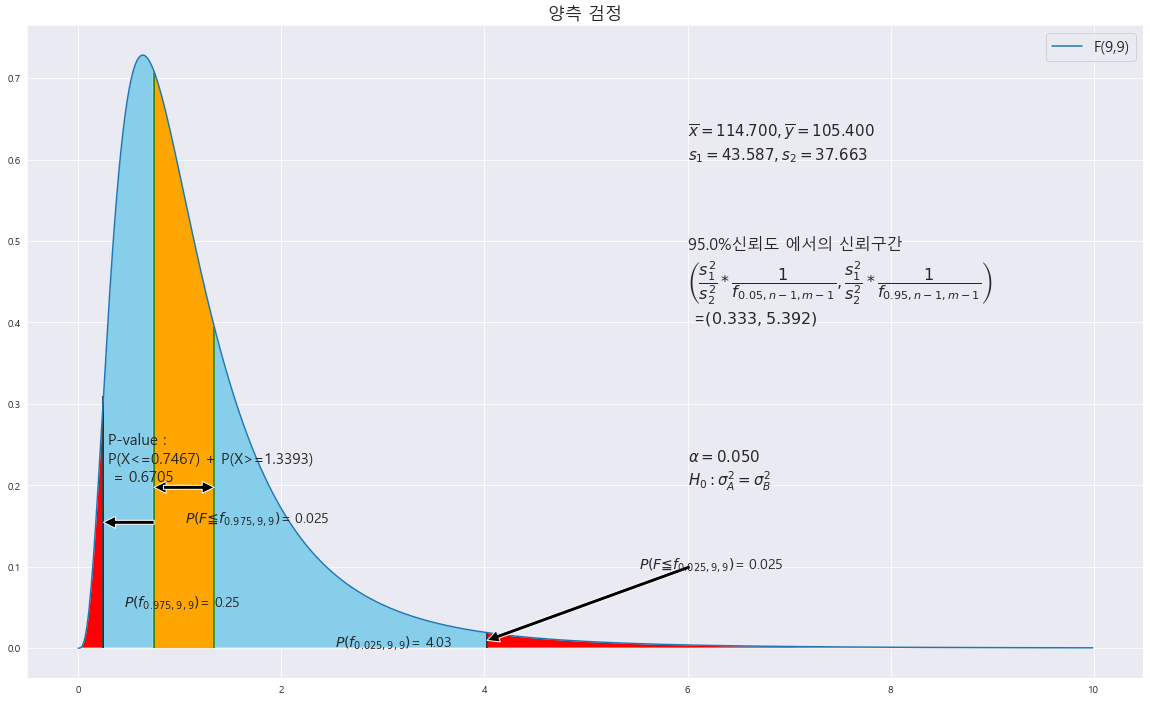

In [81]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


A = '72 75 75 80 100 110 125 150 160 200'
B = '50 60 72 90 100 125 125 130 132 170'

A = list(map(int , A.split()))
B = list(map(int ,B.split()))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = len(A)
m = len(B)
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



sample_x = np.mean(A)
stand_x = np.std(A , ddof=1)
print(f'|x : {sample_x}')
print(f's_x : {stand_x}')
sample_y = np.mean(B)
stand_y = np.std(B , ddof=1)
print(f'|y : {sample_y}')
print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

|x : 1.0272727272727271
s_x : 0.4941475672122835
|y : 1.6615384615384614
s_y : 0.5937710859953544


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.3735528498353053
X_R_1 : 1.4055
X_L_1 : 0.6926


<ipython-input-82-5bd477aca809>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


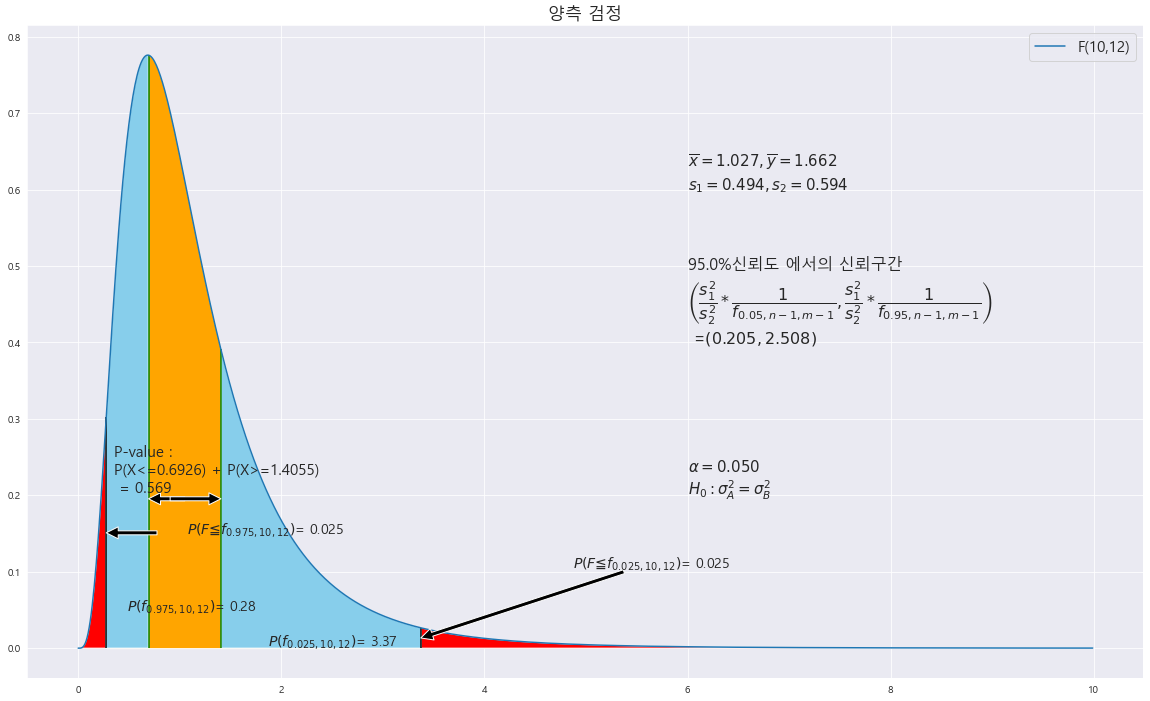

In [82]:





X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


A = '0.8 1.8 1.0 0.1 0.9 1.7 1.4 1.0 0.9 1.2 0.5'
B = '1.0 0.8 1.6 2.6 1.3 1.1 2.4 1.8 2.5 1.4 1.9 2.0 1.2'

A= list(map(float , A.split(' ')))
B = list(map(float , B.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = len(A)
m = len(B)
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



sample_x = np.mean(A)
stand_x = np.std(A , ddof=1)
print(f'|x : {sample_x}')
print(f's_x : {stand_x}')
sample_y = np.mean(B)
stand_y = np.std(B , ddof=1)
print(f'|y : {sample_y}')
print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)